# 回归问题预测

* Tensorflow 2 版本中将大量使用keras的简介建模方法

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
features=pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


数据表

* temp_2: 前天的最高气温
* temp_1: 昨天的最高温度值
* average: 在历史中，每年这一天的平均最高温度值
* actual: 当前的真实最高温度值
* friend: 朋友的猜测

In [7]:
print('数据维度',features.shape)

数据维度 (348, 9)


In [10]:
import datetime

years=features['year']
months=features['month']
days=features['day']

dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [11]:
dates[:5]

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0)]

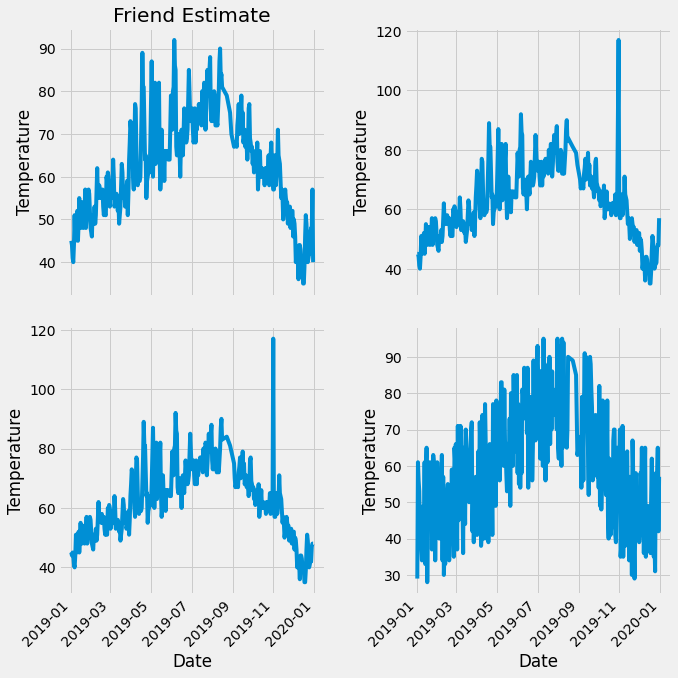

In [15]:
plt.style.use('fivethirtyeight')

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates,features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature');ax1.set_title('Max Temp')

ax2.plot(dates,features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature');ax1.set_title('Previous Max Temp')

ax3.plot(dates,features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature');ax1.set_title('Two Days Prior Max Temp')

ax4.plot(dates,features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature');ax1.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [18]:
from sklearn import preprocessing

input_feactures=preprocessing.StandardScaler().fit_transform(features)

ModuleNotFoundError: No module named 'sklearn'

# 基于Kears构建网络模型

一些常用参数已经列出，如下所示：

* activation: 激活函数的选择，-般常用relu
* kernel_initializer,bias_initializer: 权重与偏置参数的初始化方法，有时候不收敛换种初始化就突然好使了。。。玄学
* kernel_regularizer, bias_regularizer: 要不要加入正则化,
* inputs: 输入，可以自己指定，也可以让网络自动选
* units: 神经元个数


In [16]:
# 按顺序构造网络模型

model=tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

In [17]:
# compile 相当于对网络进行配置，指定号优化器和损失函数等

model.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss='mean_squared_error')

In [ ]:
model.fit(input_features,la)